In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../dataset/pm25_missing.txt").drop(['datetime'], axis = 1)
df = df[df.columns[:3]][1000:2000].reset_index(drop=True)
target = torch.tensor(df.values).T.to(device).reshape(3,len(df))
input = torch.tensor(df.index + 1, dtype=float).to(device)

In [4]:
find_index_input = input.clone().detach()
fine_index_target = target.clone().detach()

In [12]:
fine_index_target

tensor([[16.,  8.,  7.,  ..., 27., 27., 27.],
        [16., 15.,  6.,  ...,  6.,  3.,  5.],
        [17., 17., 14.,  ..., 31., 27., 38.]], device='cuda:0',
       dtype=torch.float64)

In [29]:
index_

[[598], [545], [608]]

In [14]:
index_

[[598], [545], [608]]

In [37]:
fine_index_target[0,index_[0]]

tensor(nan, device='cuda:0', dtype=torch.float64)

In [13]:
index_ = torch.argmax(torch.abs(torch.nan_to_num(fine_index_target)), dim = 1).reshape(3,1).cpu().detach().tolist()

In [67]:
center_index_list = []
for i in range(5):
    index_ = torch.argmax(torch.abs(torch.nan_to_num(fine_index_target)), dim = 1).reshape(3,1).cpu().detach().tolist()
    for j in range(3):
        fine_index_target[j,index_[j]] = 0.
    center_index_list.append(index_)

In [68]:
center_index_list = torch.tensor(center_index_list, device= device)
center_index_list = center_index_list.reshape(5, 3).T

initcenter = (center_index_list + 1)[:,-5:].T

In [70]:
center_index_list

tensor([[600, 630, 555, 874, 908],
        [554, 611, 595, 875, 637],
        [595, 596, 626, 637, 629]], device='cuda:0')

In [69]:
initcenter

tensor([[601, 555, 596],
        [631, 612, 597],
        [556, 596, 627],
        [875, 876, 638],
        [909, 638, 630]], device='cuda:0')

In [63]:
center_index_list[:,-5:]

tensor([[529, 534, 610, 634, 907],
        [626, 636, 876, 906, 594],
        [875, 634, 872, 130, 878]], device='cuda:0')

In [12]:
find_weight = target.clone().detach()

In [13]:
find_weight

tensor([[16.,  8.,  7.,  ..., 27., 27., 27.],
        [16., 15.,  6.,  ...,  6.,  3.,  5.],
        [17., 17., 14.,  ..., 31., 27., 38.]], device='cuda:0',
       dtype=torch.float64)

In [34]:
initweights = []
for i in range(3):
    initweights.append(torch.index_select(find_weight[i], 0, center_index_list[i]))

In [35]:
initweights

[tensor([231., 224., 222., 221., 220.], device='cuda:0', dtype=torch.float64),
 tensor([206., 204., 202., 201., 199.], device='cuda:0', dtype=torch.float64),
 tensor([231., 231., 230., 230., 229.], device='cuda:0', dtype=torch.float64)]

In [37]:
torch.concat(initweights).reshape(3, 5)

tensor([[231., 224., 222., 221., 220.],
        [206., 204., 202., 201., 199.],
        [231., 231., 230., 230., 229.]], device='cuda:0', dtype=torch.float64)

In [49]:
find_sigma = delta.clone().detach()

In [50]:
find_sigma.size()

torch.Size([3, 1000])

In [64]:
initsigma = []
for i in range(3):
    initsigma.append(torch.index_select(find_sigma[i], 0, center_index_list[i][-5:]))
initsigma = torch.concat(initweights).reshape(5, 3)

In [65]:
initsigma

tensor([[231., 224., 222.],
        [221., 220., 206.],
        [204., 202., 201.],
        [199., 231., 231.],
        [230., 230., 229.]], device='cuda:0', dtype=torch.float64)

In [66]:
initcenters

NameError: name 'initcenters' is not defined

In [ ]:
initsigma = torch.index_select(find_sigma, 0, center_index_list)[-self.add_rbf_num:].reshape(self.add_rbf_num,1)

In [88]:
def first_rbf_parameter( target, masking): # done
    add_rbf_num = 10
    in_feature = 3
    # input_data shape : (data_num)
    # target data shape : (in_feature, data_num)
    
    # first layer centers, weights, sigmas
    # centers, sigmas : (add_rbf_num, 1)
    # weights : (in_feature, add_rbf_num)

    fine_index_target = target.clone().detach()

    find_sigma = masking.clone().detach()
    find_weight = target.clone().detach()
    center_index_list = []

    # first single parameters
    center_index_list = []
    for i in range(add_rbf_num):
        index_ = torch.argmax(torch.abs(torch.nan_to_num(fine_index_target)), dim = 1).reshape(3,1).cpu().detach().tolist()
        for j in range(in_feature):
            fine_index_target[j,index_[j]] = 0.
        center_index_list.append(index_)

    center_index_list = torch.tensor(center_index_list, device= device)
    center_index_list = center_index_list.reshape(add_rbf_num, in_feature).T

    initcenter = (center_index_list + 1)[:,-add_rbf_num:].T
    
    initweight = []
    for i in range(in_feature):
        initweight.append(torch.index_select(find_weight[i], 0, center_index_list[i][-add_rbf_num:]))
    initweight = torch.concat(initweight).reshape(in_feature, add_rbf_num)

    initsigma = []
    for i in range(in_feature):
        initsigma.append(torch.index_select(find_sigma[i], 0, center_index_list[i][-add_rbf_num:]))
    initsigma = torch.concat(initsigma).reshape(add_rbf_num, in_feature)

    # first MultiRBFs initial sigmas parameters

    return initcenter.reshape(self.in_feature,self.add_rbf_num,1), initweight, initsigma.reshape(self.in_feature,self.add_rbf_num,1)

In [87]:
delta

tensor([[0.5000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.5000],
        [0.5000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.5000],
        [0.5000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.5000]],
       device='cuda:0', dtype=torch.float64)

In [89]:
initcenter, initweight, initsigma = first_rbf_parameter(target, delta)

In [46]:
def time_interval(masking):
    interval = torch.zeros_like(masking)
    for m in range(masking.size(0)):
        for i in range(masking.size(1)):
            after = 0
            before = 0
            after_index = i + 1
            before_index = i - 1
            if i == 0:
                while after == 0 and after_index < masking.size(1):
                    if masking[m][after_index] != 1:
                        after_index += 1
                    else:
                        after = 1
                        interval[m][i] = (after_index - i) / 2
            elif i == masking.size(1)-1:
                while before == 0 and before_index > -1:
                    if masking[m][before_index] != 1:
                        before_index -= 1
                    else:
                        before = 1
                        interval[m][i] = (i - before_index) / 2 
            else:
                after = 0
                before = 0
                while before == 0 and before_index > -1:
                    if masking[m][before_index] != 1:
                        before_index -= 1
                    else:
                        before = 1
                while after == 0 and after_index < masking.size(1):
                    if masking[m][after_index] != 1:
                        after_index += 1
                    else:
                        after = 1
                interval[m][i] = (after_index - before_index) / 2
    return interval

In [47]:
delta = time_interval(value_masking)

In [39]:
value_masking = torch.where(target.isnan(), 0.0, 1.0).to(torch.float64)

In [ ]:
def rbf_gaussian(self, input_data):
    out = torch.exp(-1 *(torch.pow((input_data - self.centers), 2)) / (torch.pow(self.sigma, 2)))

    return out

def rbf_gaussian_multi(self, input_data):
    out = torch.exp(-1 *(torch.pow((input_data - self.centers_multi), 2)) / (torch.pow(self.sigma_multi, 2)))

    return out

def forward(self, input_data):
    R = self.rbf_gaussian(input_data)
    R_multi = self.rbf_gaussian_multi(input_data)
    pred = torch.mm(self.weights, R) + torch.mm(self.weights_multi, R_multi)

    return R, R_multi, pred

In [111]:
out = torch.exp(-1 *(torch.pow((input - initcenter.reshape(3,10,1)), 2)) / (torch.pow(initsigma.reshape(3,10,1), 2)))

In [120]:
out.size()

torch.Size([3, 10, 1000])

In [121]:
initweight.reshape(3,1,10)

tensor([[[256., 250., 246., 236., 232., 231., 224., 222., 221., 220.]],

        [[223., 215., 213., 210., 207., 206., 204., 202., 201., 199.]],

        [[252., 251., 235., 235., 235., 231., 231., 230., 230., 229.]]],
       device='cuda:0', dtype=torch.float64)

In [124]:
pred = torch.matmul(initweight.reshape(3,1,10), out)

In [ ]:
def rbf_gaussian_derivative_centers( input_data): # done
    output = (2 * (input_data - centers) / (torch.pow(sigma, 2))) * rbf_gaussian(input_data)

    return output  # size = (add_rbf_num, data_num)

In [126]:
out.size()

torch.Size([3, 10, 1000])

In [130]:
((2 * (input - initcenter.reshape(3,10,1)) / (torch.pow(initsigma.reshape(3,10,1), 2))) * out).size()

torch.Size([3, 10, 1000])

In [133]:
L2_1_error = -2 * (target.reshape(3,1,1000) - pred)

In [134]:
de_sigma = (2 * torch.pow((input - initcenter.reshape(3,10,1)), 2) / (torch.pow(initsigma.reshape(3,10,1), 3))) * out

In [135]:
deltaSigma = de_sigma * L2_1_error

In [145]:
torch.sum((deltaSigma * initweight.reshape(3,10,1)), 2).size()

torch.Size([3, 10])

In [146]:
out.size()

torch.Size([3, 10, 1000])

In [149]:
initweight.size()

torch.Size([3, 10])

In [148]:
torch.sum((out * L2_1_error.reshape(3, 1, input.size(0))), dim=2).size()

torch.Size([3, 10])

In [138]:
delta_weight1 = torch.sum((R * L2_1_error.reshape(3, 1, input.size(0))), dim=2)
delta_weight = delta_weight1 

RuntimeError: The size of tensor a (1000) must match the size of tensor b (10) at non-singleton dimension 2

In [ ]:
def BP(self, input_data, target, R, pred):
    
    pred = pred * self.rbf_masking
    L2_1_error = -2 * (target - pred)

    # sigma update 
    deltaSigma1 = self.rbf_gaussian_derivative_sigma(input_data) * L2_1_error.reshape(self.in_feature, 1, input_data.size(0)) # (in_feature, add_rbf_num, datalen)
    deltaSigma1 = deltaSigma1 * self.weights.reshape(self.in_feature, self.add_rbf_num, 1)                                    # (in_feature, add_rbf_num, datalen)
    deltaSigma = torch.sum(deltaSigma1, dim=2) / torch.sum(self.rbf_masking, dim = 1).reshape(self.in_feature,1)

    # center update
    deltaCenter1 = self.rbf_gaussian_derivative_centers(input_data) * L2_1_error.reshape(self.in_feature, 1, input_data.size(0))    # (in_feature, add_rbf_num, datalen)
    deltaCenter1 = deltaCenter1 * self.weights.reshape(self.in_feature, self.add_rbf_num, 1)                                        # (in_feature, add_rbf_num, datalen)
    deltaCenter =  torch.sum(deltaCenter1, dim=2) / torch.sum(self.rbf_masking, dim = 1).reshape(self.in_feature,1)
    
    # weight update
    delta_weight1 = torch.sum((R * L2_1_error.reshape(self.in_feature, 1, input_data.size(0))), dim=2)
    delta_weight = delta_weight1 / torch.sum(self.rbf_masking, dim = 1).reshape(self.in_feature,1)

    # BP update
    self.weights -= self.lr * delta_weight.reshape(self.in_feature, 1 ,self.add_rbf_num)
    self.centers -= self.lr * deltaCenter.reshape(self.in_feature, self.add_rbf_num, 1)
    self.sigma -= self.lr * deltaSigma.reshape(self.in_feature, self.add_rbf_num, 1)

In [35]:
class SingleRBFNN(nn.Module):
    def __init__(self, in_feature, add_rbf_num, device):
        super(SingleRBFNN, self).__init__()

        self.add_rbf_num = add_rbf_num  # additional RBFs number
        self.in_feature = in_feature    # count features
        self.device = device
        self.centers_list = []
        self.sigmas_list = []
        self.weights_list = []
        self.weights_multi_list = []
        self.centers_multi_list = []
        self.sigma_multi_list = []

        self.change_th = 3

    def first_rbf_parameter(self, target, masking): # done

        # input_data shape : (data_num)
        # target data shape : (in_feature, data_num)
        
        # first layer centers, weights, sigmas
        # centers, sigmas : (in_feature, add_rbf_num, 1)
        # weights : (in_feature, 1, add_rbf_num)

        fine_index_target = target.clone().detach()

        find_sigma = masking.clone().detach()
        find_weight = target.clone().detach()
        center_index_list = []

        # first single parameters
        center_index_list = []
        for i in range(self.add_rbf_num):
            index_ = torch.argmax(torch.abs(torch.nan_to_num(fine_index_target)), dim = 1).reshape(self.in_feature,1).cpu().detach().tolist()
            for j in range(self.in_feature):
                fine_index_target[j,index_[j]] = 0.
            center_index_list.append(index_)

        center_index_list = torch.tensor(center_index_list, device= device)
        center_index_list = center_index_list.reshape(self.add_rbf_num, self.in_feature).T

        initcenter = (center_index_list + 1)[:,-self.add_rbf_num:].T.float()
        
        initweight = []
        for i in range(self.in_feature):
            initweight.append(torch.index_select(find_weight[i], 0, center_index_list[i][-self.add_rbf_num:]))
        initweights = torch.concat(initweight).reshape(self.in_feature, self.add_rbf_num)

        initsigma = []
        for i in range(self.in_feature):
            initsigma.append(torch.index_select(find_sigma[i], 0, center_index_list[i][-self.add_rbf_num:]))
        initsigmas = torch.concat(initsigma).reshape(self.add_rbf_num, self.in_feature)

        # first MultiRBFs initial sigmas parameters

        return initcenter.reshape(self.in_feature,self.add_rbf_num,1), initweights.reshape(self.in_feature,1,self.add_rbf_num), initsigmas.reshape(self.in_feature,self.add_rbf_num,1)

    
    def add_rbf_parameter(self, error, masking):
        fine_index_target = error.clone().detach()

        find_sigma = masking.clone().detach()
        find_weight = error.clone().detach()
        center_index_list = []

        # first single parameters
        center_index_list = []
        for i in range(self.add_rbf_num):
            index_ = torch.argmax(torch.abs(torch.nan_to_num(fine_index_target)), dim = 1).reshape(self.in_feature,1).cpu().detach().tolist()
            for j in range(self.in_feature):
                fine_index_target[j,index_[j]] = 0.
            center_index_list.append(index_)

        center_index_list = torch.tensor(center_index_list, device= device)
        center_index_list = center_index_list.reshape(self.add_rbf_num, self.in_feature).T

        initcenter = (center_index_list + 1)[:,-self.add_rbf_num:].T.float()
        
        initweight = []
        for i in range(self.in_feature):
            initweight.append(torch.index_select(find_weight[i], 0, center_index_list[i][-self.add_rbf_num:]))
        initweight = torch.concat(initweight).reshape(self.in_feature, self.add_rbf_num)

        initsigma = []
        for i in range(self.in_feature):
            initsigma.append(torch.index_select(find_sigma[i], 0, center_index_list[i][-self.add_rbf_num:]))
        initsigma = torch.concat(initsigma).reshape(self.add_rbf_num, self.in_feature)

        # first MultiRBFs initial sigmas parameters

        return initcenter.reshape(self.in_feature,self.add_rbf_num,1), initweight.reshape(self.in_feature,1,self.add_rbf_num), initsigma.reshape(self.in_feature,self.add_rbf_num,1)
    
    def masking(self, target):
        
        # value_masking vector
        value_masking = torch.where(target.isnan(), 0.0, 1.0).to(torch.float64)
        
        return value_masking
    
    def time_interval(self, masking):
        interval = torch.zeros_like(masking)
        for m in range(masking.size(0)):
            for i in range(masking.size(1)):
                after = 0
                before = 0
                after_index = i + 1
                before_index = i - 1
                if i == 0:
                    while after == 0 and after_index < masking.size(1):
                        if masking[m][after_index] != 1:
                            after_index += 1
                        else:
                            after = 1
                            interval[m][i] = (after_index - i) / 2
                elif i == masking.size(1)-1:
                    while before == 0 and before_index > -1:
                        if masking[m][before_index] != 1:
                            before_index -= 1
                        else:
                            before = 1
                            interval[m][i] = (i - before_index) / 2 
                else:
                    after = 0
                    before = 0
                    while before == 0 and before_index > -1:
                        if masking[m][before_index] != 1:
                            before_index -= 1
                        else:
                            before = 1
                    while after == 0 and after_index < masking.size(1):
                        if masking[m][after_index] != 1:
                            after_index += 1
                        else:
                            after = 1
                    interval[m][i] = (after_index - before_index) / 2
        return interval
    
    def masking_of_target(self, target, ratio):
        rbf_masking = target.clone().detach()
        indices = torch.nonzero(rbf_masking == 1)  # 배열에서 값이 1인 인덱스 추출
        num_ones = indices.size(0)  # 값이 1인 요소의 개수

        num_zeros_to_replace = int(num_ones * ratio)  # 바꿀 1의 개수 계산
        if num_zeros_to_replace > 0:
            chosen_indices = torch.randperm(num_ones)[:num_zeros_to_replace]  # 바꿀 1의 인덱스를 무작위로 선택

            for index in chosen_indices:
                rbf_masking[indices[index][0], indices[index][1]] = 0  # 선택된 인덱스의 값을 0으로 변경

        return rbf_masking
    
    
    def rbf_gaussian(self, input_data):
        out = torch.exp(-1 *(torch.pow((input_data - self.centers), 2)) / (torch.pow(self.sigma, 2)))

        return out

    def forward(self, input_data):
        R = self.rbf_gaussian(input_data)
        pred = torch.matmul(self.weights, R)

        return R, pred

    def rbf_gaussian_derivative_centers(self, input_data): # done
        output = (2 * (input_data - self.centers) / (torch.pow(self.sigma, 2))) * self.rbf_gaussian(input_data)

        return output  # size = (in_feature, add_rbf_num, data_num) 

    def rbf_gaussian_derivative_sigma(self, input_data): # done
        output = (2 * torch.pow((input_data - self.centers), 2) / (torch.pow(self.sigma, 3))) * self.rbf_gaussian(input_data)

        return output  # size = (in_feature, add_rbf_num, data_num) 
                
    # Backpropagation and train

    def BP(self, input_data, target, R, pred):
        
        pred = pred * self.rbf_masking.reshape(self.in_feature, 1, input_data.size(0))
        L2_1_error = -2 * (target.reshape(self.in_feature, 1, input_data.size(0)) - pred)

        # sigma update 
        deltaSigma1 = self.rbf_gaussian_derivative_sigma(input_data) * L2_1_error                                                 # (in_feature, add_rbf_num, datalen)
        deltaSigma1 = deltaSigma1 * self.weights.reshape(self.in_feature, self.add_rbf_num, 1)                                    # (in_feature, add_rbf_num, datalen)
        deltaSigma = torch.sum(deltaSigma1, dim=2) / torch.sum(self.rbf_masking, dim = 1).reshape(self.in_feature,1)

        # center update
        deltaCenter1 = self.rbf_gaussian_derivative_centers(input_data) * L2_1_error                                                    # (in_feature, add_rbf_num, datalen)
        deltaCenter1 = deltaCenter1 * self.weights.reshape(self.in_feature, self.add_rbf_num, 1)                                        # (in_feature, add_rbf_num, datalen)
        deltaCenter =  torch.sum(deltaCenter1, dim=2) / torch.sum(self.rbf_masking, dim = 1).reshape(self.in_feature,1)
        
        # weight update
        delta_weight1 = torch.sum((R * L2_1_error.reshape(self.in_feature, 1, input_data.size(0))), dim=2)
        delta_weight = delta_weight1 / torch.sum(self.rbf_masking, dim = 1).reshape(self.in_feature,1)

        # BP update
        self.weights -= self.lr * delta_weight.reshape(self.in_feature, 1 ,self.add_rbf_num)
        self.centers -= self.lr * deltaCenter.reshape(self.in_feature, self.add_rbf_num, 1)
        self.sigma -= self.lr * deltaSigma.reshape(self.in_feature, self.add_rbf_num, 1)

    def change_init(self, na):
        if na == 1:
            loss_list = self.train_loss_list[-self.change_th:]
            if self.number > self.change_th and max(loss_list) == min(loss_list):
                self.change_time += 1
            elif self.number > self.change_th and loss_list[0] < loss_list[1] and loss_list[1] < loss_list[2]:
                self.change_time += 1
            else:
                self.change_time = 0
        else:
            self.change_time += 1
    
    def plot_train(self, input_data, best_pred): #done
        masking_index = torch.ones_like(self.rbf_masking) - self.rbf_masking
        best_pred_masking = best_pred

        if self.in_feature != 1:
            fig, ax = plt.subplots(1, self.in_feature, figsize = (30, 5))
            for i in range(self.in_feature):
                ax[i].scatter(input_data.cpu().detach().numpy(), torch.nan_to_num(self.target[i]).cpu().detach().numpy())
                ax[i].scatter(input_data.cpu().detach().numpy(), best_pred[i].cpu().detach().numpy())
                # ax[i].scatter(input_data[self.rbf_masking[i] != 1].cpu().detach().numpy(), best_pred[i][self.rbf_masking[i] != 1].cpu().detach().numpy())
            plt.show()
        
        else:
            plt.scatter(input_data.cpu().detach().numpy(), torch.nan_to_num(self.target[0]).cpu().detach().numpy())
            plt.scatter(input_data.cpu().detach().numpy(), best_pred_masking[0].cpu().detach().numpy())
            plt.show()

    def best_forward(self, input_data, best_center, best_sigma, best_weight): # ?

        rbf_output = torch.exp(-1 *(torch.pow((input_data - best_center), 2)) / (torch.pow(best_sigma, 2)))
        pred = torch.matmul(best_weight, rbf_output)

        return pred
    
    def Loss(self, pred, target):
        # value L2 loss
        pred = pred.reshape(self.in_feature, pred.size(-1)) * self.value_masking
        x_loss = torch.sum(torch.abs(pred - target)) /torch.sum(self.value_masking)
        return x_loss
    
    def pred(self, input_data):
        rbf_output = torch.exp(-1 * (torch.pow((input_data - self.done_centers), 2) / \
                                     (torch.pow(self.done_sigma, 2))))
        pred = torch.matmul(self.done_weights, rbf_output)

        return rbf_output, pred
        
    def train(self, input_data, target, epochs, lr, loss_th, lr_change_th, masking_rate = 0.5):
        self.lr = lr
        self.target = target.clone().detach()
        self.number = 0
        self.train_loss_list = []
        self.loss_th = loss_th
        self.lr_change_th = lr_change_th
        self.target_mape_th = torch.mean(torch.abs(target)) * 0.05
        self.round_number = 5
        self.change_time = 0
        count_loss_chage = 0
        count_round_change = 0

        break_time = len(input_data) / self.add_rbf_num

        loss = 100000
        
        while self.loss_th < loss:

            print("{}th additional rbflayer".format(self.number))
            # first rbflayer
            if self.number == 0:
                self.value_masking = self.masking(self.target)

                self.rbf_masking = self.masking_of_target(self.value_masking, masking_rate)
                time_inter = self.time_interval(self.rbf_masking)
                self.step_target = torch.nan_to_num(self.target) * self.rbf_masking

                self.centers, self.weights, self.sigma = self.first_rbf_parameter(self.step_target, time_inter)
                
                for epoch in range(epochs):
                    # print("epoch : {}".format(epoch))
                    R, pred = self.forward(input_data)

                    self.BP(input_data, self.step_target, R, pred)
                    R, pred = self.forward(input_data)
                    epoch_loss = self.Loss(pred, torch.nan_to_num(self.target))

                    if epoch == 0:
                        print("{}th additional RBFlayer {}th epoch loss: {}".format(self.number, epoch, epoch_loss))
                        self.best_loss = epoch_loss.clone().detach()
                        self.best_center = self.centers.clone().detach()
                        self.best_sigma = self.sigma.clone().detach()
                        self.best_weight = self.weights.clone().detach()
                    
                    else:
                        if self.best_loss > epoch_loss:
                            self.best_loss = epoch_loss.clone().detach()
                            self.best_center = self.centers.clone().detach()
                            self.best_sigma = self.sigma.clone().detach()
                            self.best_weight = self.weights.clone().detach()

                    if (epoch + 1) % 1000 == 0:
                        print("{}th additional RBFlayer {}th epoch MAE Loss: {}".format(self.number, epoch, epoch_loss))

            else:
                self.change_init(na)
                if self.change_time > break_time:
                    break

                # rbf_masking
                self.rbf_masking = self.masking_of_target(self.value_masking, masking_rate)
                self.step_target = torch.nan_to_num(self.target) * self.rbf_masking
                
                
                self.centers, self.weights, self.sigma = self.add_rbf_parameter(self.step_target, time_inter)
                for epoch in range(epochs):
                    R, pred = self.forward(input_data)
                    if epoch == 0:
                        
                        print("{}th additional RBFlayer {}th epoch loss: {}".format(self.number, epoch,
                                                                                        self.Loss(pred, torch.nan_to_num(self.target))))
                        self.best_loss = self.Loss(pred, torch.nan_to_num(self.target))
                        self.best_center = self.centers.clone().detach()
                        self.best_sigma = self.sigma.clone().detach()
                        self.best_weight = self.weights.clone().detach()

                    self.BP(input_data, self.step_target, R, pred)
                    R, pred = self.forward(input_data)
                    epoch_loss = self.Loss(pred, torch.nan_to_num(self.target))

                    if (epoch + 1) % 1000 == 0:
                        print("{}th additional RBFlayer {}th epoch MAE Loss: {}".format(self.number, epoch, epoch_loss))
                    if self.best_loss > epoch_loss:
                        self.best_loss = epoch_loss.clone().detach()

                        self.best_center = self.centers.clone().detach()
                        self.best_sigma = self.sigma.clone().detach()
                        self.best_weight = self.weights.clone().detach()

            best_pred = self.best_forward(input_data, self.best_center, self.best_sigma, self.best_weight)
            
            
            if self.number ==0:
                train_loss = self.Loss(best_pred, torch.nan_to_num(self.target))
            else:
                train_loss = self.Loss(best_pred, torch.nan_to_num(self.target))

            print("{}th additional RBFlayer best loss : {}".format(self.number, train_loss))

            if self.best_loss < self.lr_change_th:
                count_loss_chage += 1
                self.lr *= 10
                self.lr_change_th *= 0.3
                print("change lr ", self.lr)
                print('----------------------------------------------')
                
            if count_round_change == 0 and train_loss < self.target_mape_th:
                count_round_change += 1
                self.round_number += 1
                print("change round number", self.round_number)
                print('----------------------------------------------')
                
            self.train_loss_list.append(train_loss)

            # additional rbf plot print
            self.plot_train(input_data, best_pred.reshape(self.in_feature, best_pred.size(-1)))

            if torch.isnan(train_loss) == False:
                na = 1
                self.target = self.target - best_pred.reshape(self.in_feature, best_pred.size(-1))  # target update
                loss = train_loss  # loss update
                self.number += 1  # additional rbf number update
                
                self.centers_list.append(self.best_center)
                self.sigmas_list.append(self.best_sigma)
                self.weights_list.append(self.best_weight)

                self.done_centers = torch.cat(self.centers_list, dim  = 1)
                self.done_sigma = torch.cat(self.sigmas_list, dim = 1)
                self.done_weights = torch.cat(self.weights_list, dim = 2)

            else:
                na = 0

In [36]:
df = pd.read_csv("../dataset/pm25_missing.txt").drop(['datetime'], axis = 1)
df = df[df.columns[:3]][1000:2000].reset_index(drop=True)
target = torch.tensor(df.values).T.to(device).reshape(3,len(df))
input = torch.tensor(df.index + 1, dtype=float).to(device)

0th additional rbflayer
0th additional RBFlayer 0th epoch loss: 69.77325090929465
0th additional RBFlayer 999th epoch MAE Loss: 38.644003295752064
0th additional RBFlayer 1999th epoch MAE Loss: 36.07450536811961
0th additional RBFlayer 2999th epoch MAE Loss: 34.80261006130772
0th additional RBFlayer best loss : 34.80261006130772


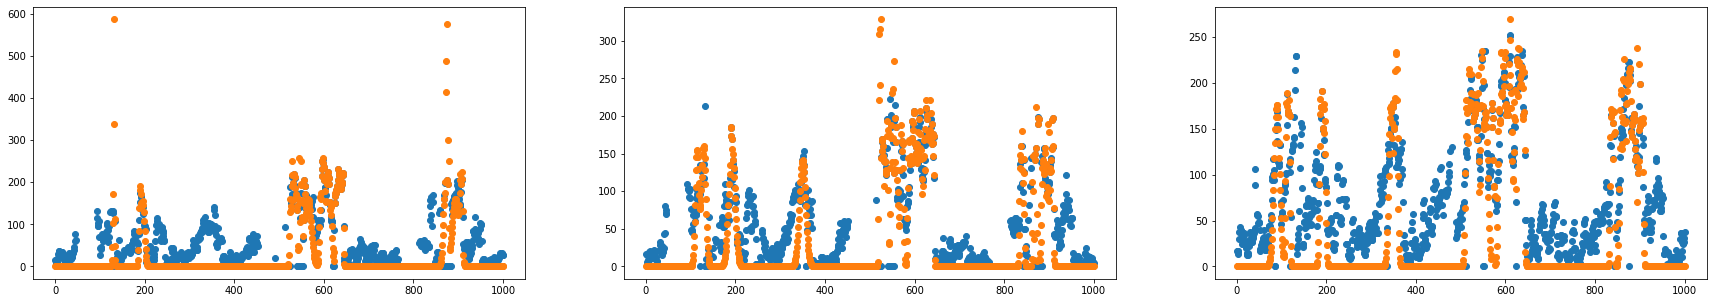

1th additional rbflayer
1th additional RBFlayer 0th epoch loss: 40.06338865218762
1th additional RBFlayer 999th epoch MAE Loss: 25.75807400278331
1th additional RBFlayer 1999th epoch MAE Loss: 23.97999147058351
1th additional RBFlayer 2999th epoch MAE Loss: 22.95837301063364
1th additional RBFlayer best loss : 22.95837301063364


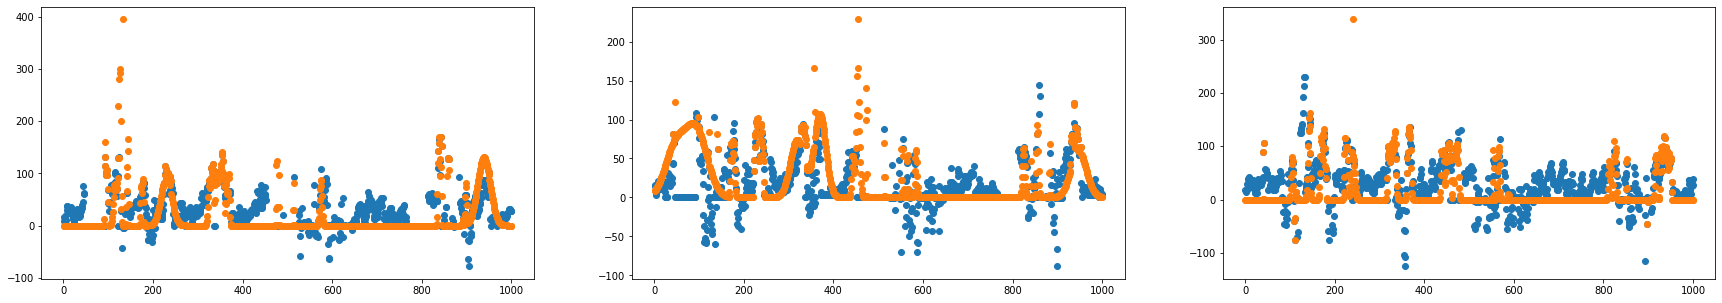

2th additional rbflayer
2th additional RBFlayer 0th epoch loss: 28.155090483468477
2th additional RBFlayer 999th epoch MAE Loss: 19.243784557959625
2th additional RBFlayer 1999th epoch MAE Loss: 17.609466251888126
2th additional RBFlayer 2999th epoch MAE Loss: 16.920530089045894
2th additional RBFlayer best loss : 16.920530089045894
change lr  0.001
----------------------------------------------


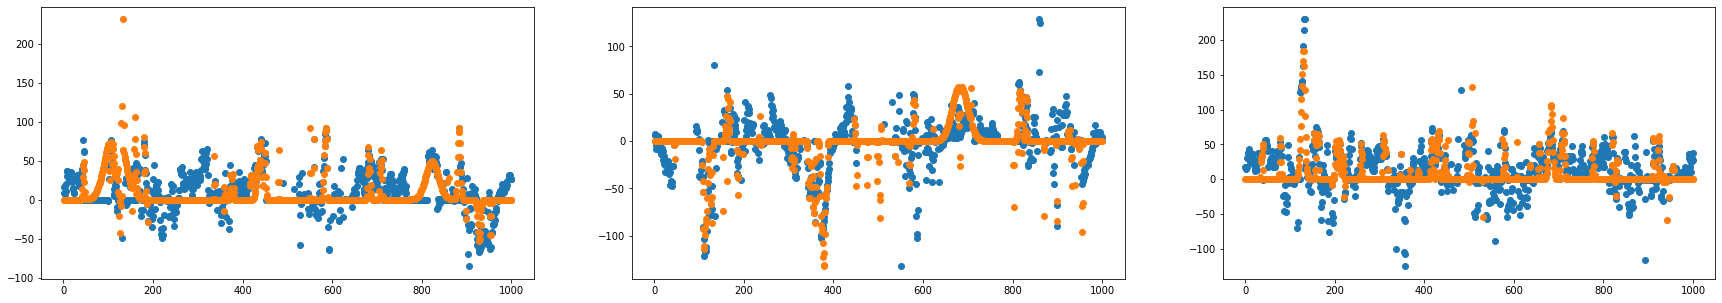

3th additional rbflayer
3th additional RBFlayer 0th epoch loss: 21.91182894080545
3th additional RBFlayer 999th epoch MAE Loss: 13.025011410832413
3th additional RBFlayer 1999th epoch MAE Loss: 12.440102692062084
3th additional RBFlayer 2999th epoch MAE Loss: 12.156216866962982
3th additional RBFlayer best loss : 12.156216866962982


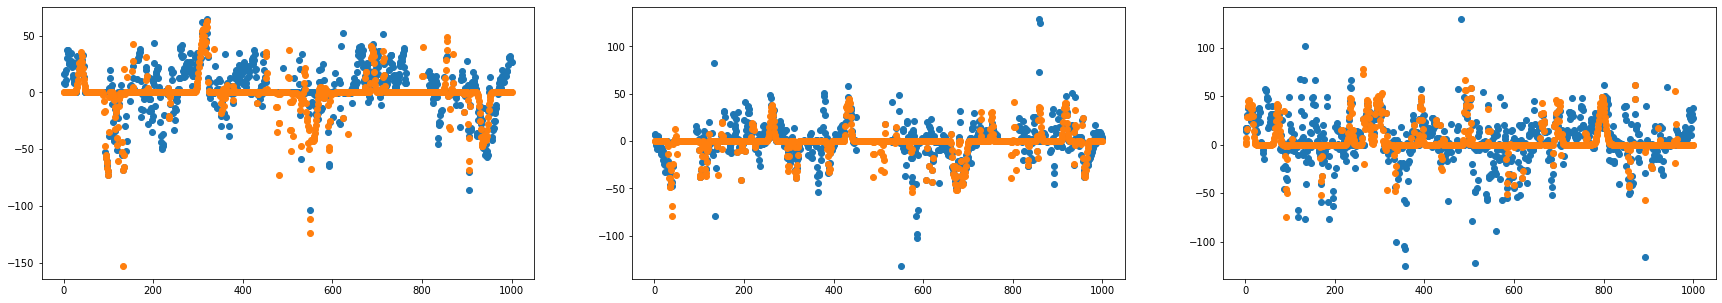

4th additional rbflayer
4th additional RBFlayer 0th epoch loss: 17.19065249218488
4th additional RBFlayer 999th epoch MAE Loss: 10.341016877656017
4th additional RBFlayer 1999th epoch MAE Loss: 9.949267683547765
4th additional RBFlayer 2999th epoch MAE Loss: 9.767504012470095
4th additional RBFlayer best loss : 9.767504012470095


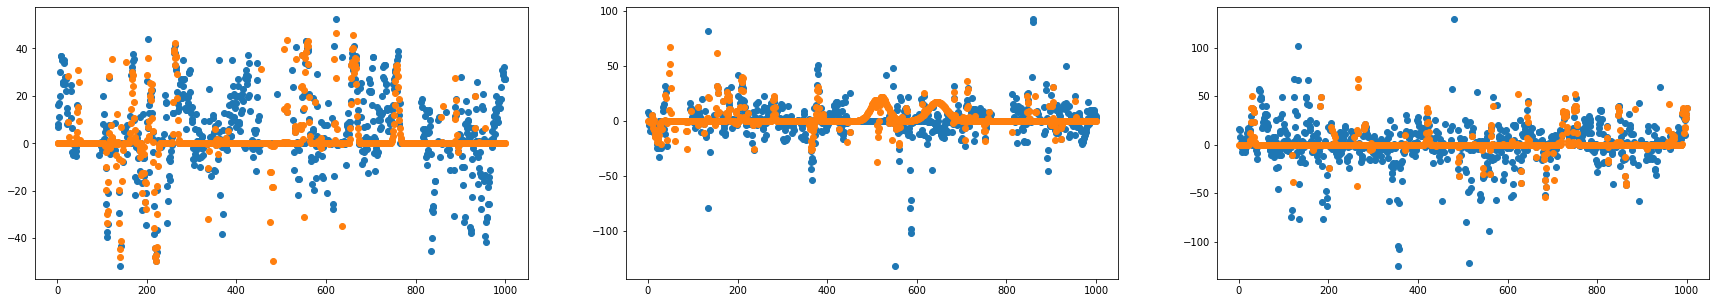

In [51]:
df = pd.read_csv("../dataset/pm25_missing.txt").drop(['datetime'], axis = 1)
df = df[df.columns[:3]][1000:2000].reset_index(drop=True)
target = torch.tensor(df.values).T.to(device).reshape(3,len(df))
input = torch.tensor(df.index + 1, dtype=float).to(device)
model = SingleRBFNN(3, 100, device)
model.train(input, target, 3000, 1e-4, 10, 20, 0.0)

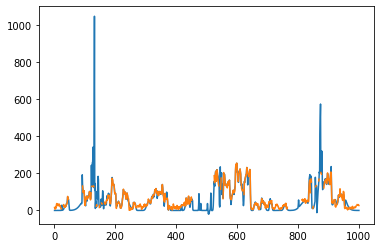

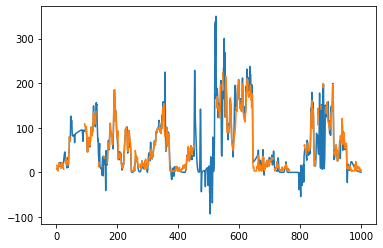

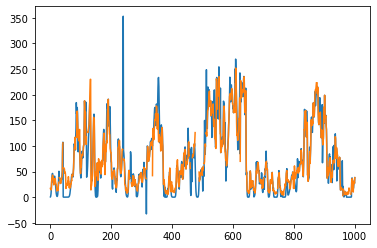

In [52]:
pred = model.pred(input)[1]
for i in range(3):
    plt.plot(input.cpu().detach().numpy(), pred[i].cpu().detach().numpy()[0])
    plt.plot(input.cpu().detach().numpy(), target[i].cpu().detach().numpy())
    plt.show()